Data Cleaning

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [2]:
df=pd.read_csv('HousePrices_HalfMil.csv')

In [3]:
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [4]:
#drop all NaN
df = df.dropna()

Data Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 64.8 MB


Text(0.5, 1.0, 'Area')

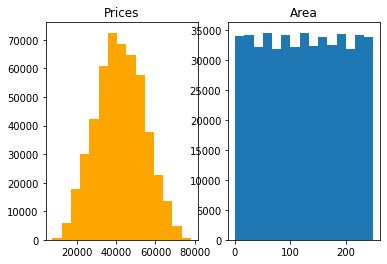

In [8]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['Prices'], bins=15,color='orange')
axs[0].set_title('Prices')
axs[1].hist(df['Area'], bins=15)
axs[1].set_title('Area')

Text(0.5, 1.0, 'FirePlace')

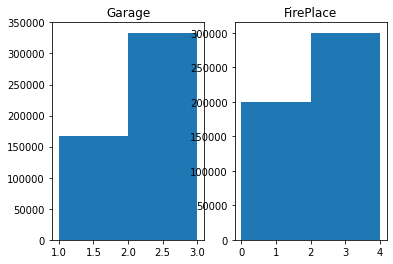

In [12]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['Garage'], bins=2)
axs[0].set_title('Garage')
axs[1].hist(df['FirePlace'], bins=2)
axs[1].set_title('FirePlace')

Text(0.5, 1.0, 'White Marble')

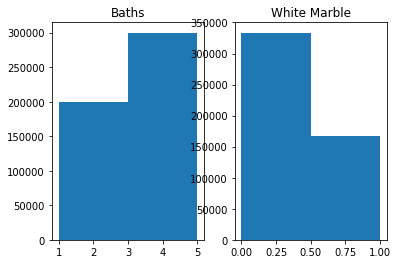

In [14]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['Baths'], bins=2)
axs[0].set_title('Baths')
axs[1].hist(df['White Marble'], bins=2)
axs[1].set_title('White Marble')

Text(0.5, 1.0, 'Indian Marble')

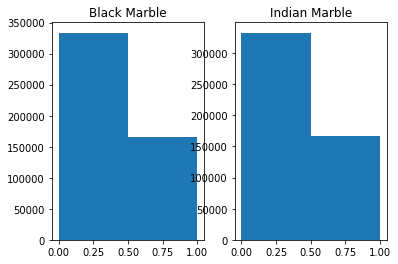

In [15]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['Black Marble'], bins=2)
axs[0].set_title('Black Marble')
axs[1].hist(df['Indian Marble'], bins=2)
axs[1].set_title('Indian Marble')

Text(0.5, 1.0, 'City')

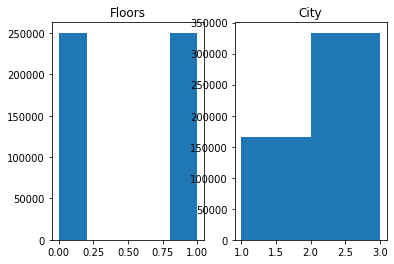

In [20]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['Floors'], bins=5)
axs[0].set_title('Floors')
axs[1].hist(df['City'], bins=2)
axs[1].set_title('City')

Text(0.5, 1.0, 'Electric')

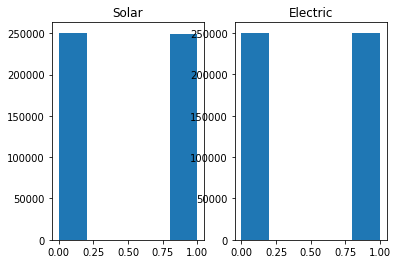

In [38]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['Solar'], bins=5)
axs[0].set_title('Solar')
axs[1].hist(df['Electric'], bins=5)
axs[1].set_title('Electric')

Text(0.5, 1.0, 'Glass Doors')

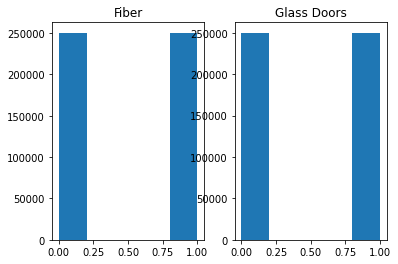

In [37]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['Fiber'], bins=5)
axs[0].set_title('Fiber')
axs[1].hist(df['Glass Doors'], bins=5)
axs[1].set_title('Glass Doors')

Text(0.5, 1.0, 'Garden')

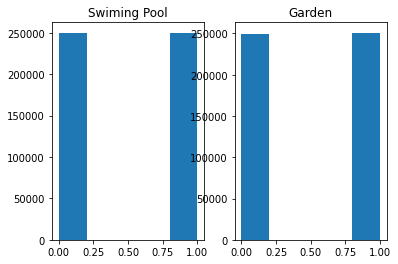

In [36]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['Swiming Pool'], bins=5)
axs[0].set_title('Swiming Pool')
axs[1].hist(df['Garden'], bins=5)
axs[1].set_title('Garden')

Correlation Analysis and Feature Selection

In [39]:
result = df.corr()
result

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.000000,-0.000897,0.000374,-0.000398,0.002525,-0.001477,-0.001047,-0.000776,-0.003455,0.000526,-0.000128,0.000114,-0.001230,0.000610,0.001428,0.147717
Garage,-0.000897,1.000000,0.001307,-0.003647,0.000541,0.001847,-0.002385,-0.000931,0.000793,0.001480,0.000779,-0.000562,-0.002171,0.001088,-0.000669,0.100294
FirePlace,0.000374,0.001307,1.000000,0.000643,0.000952,-0.000922,-0.000030,0.000185,-0.000211,-0.000309,0.001342,0.001818,-0.000366,0.001295,0.000231,0.089139
Baths,-0.000398,-0.003647,0.000643,1.000000,0.002493,-0.002739,0.000246,-0.000880,-0.000858,-0.000755,0.001047,-0.000687,-0.001668,0.002212,0.001723,0.145087
White Marble,0.002525,0.000541,0.000952,0.002493,1.000000,-0.498893,-0.500723,0.000078,-0.000861,-0.001583,0.000558,-0.000576,-0.000402,-0.001898,0.000959,0.448154
Black Marble,-0.001477,0.001847,-0.000922,-0.002739,-0.498893,1.000000,-0.500383,-0.000368,-0.000324,0.001764,-0.000549,0.000073,0.000086,0.000713,0.000133,-0.078049
Indian Marble,-0.001047,-0.002385,-0.000030,0.000246,-0.500723,-0.500383,1.000000,0.000289,0.001184,-0.000180,-0.000010,0.000503,0.000316,0.001184,-0.001091,-0.369756
Floors,-0.000776,-0.000931,0.000185,-0.000880,0.000078,-0.000368,0.000289,1.000000,-0.000641,-0.002651,0.000082,0.001373,-0.000008,-0.000211,-0.000492,0.619451
City,-0.003455,0.000793,-0.000211,-0.000858,-0.000861,-0.000324,0.001184,-0.000641,1.000000,0.000488,0.000788,-0.002716,0.000770,0.000322,0.001207,0.233259
Solar,0.000526,0.001480,-0.000309,-0.000755,-0.001583,0.001764,-0.000180,-0.002651,0.000488,1.000000,0.001883,0.000238,-0.000817,-0.000466,-0.004263,0.008429


In [40]:
#drop the columns with correlation less than 0.01
dff = df.drop(columns=['Solar', 'Swiming Pool', 'Garden'])

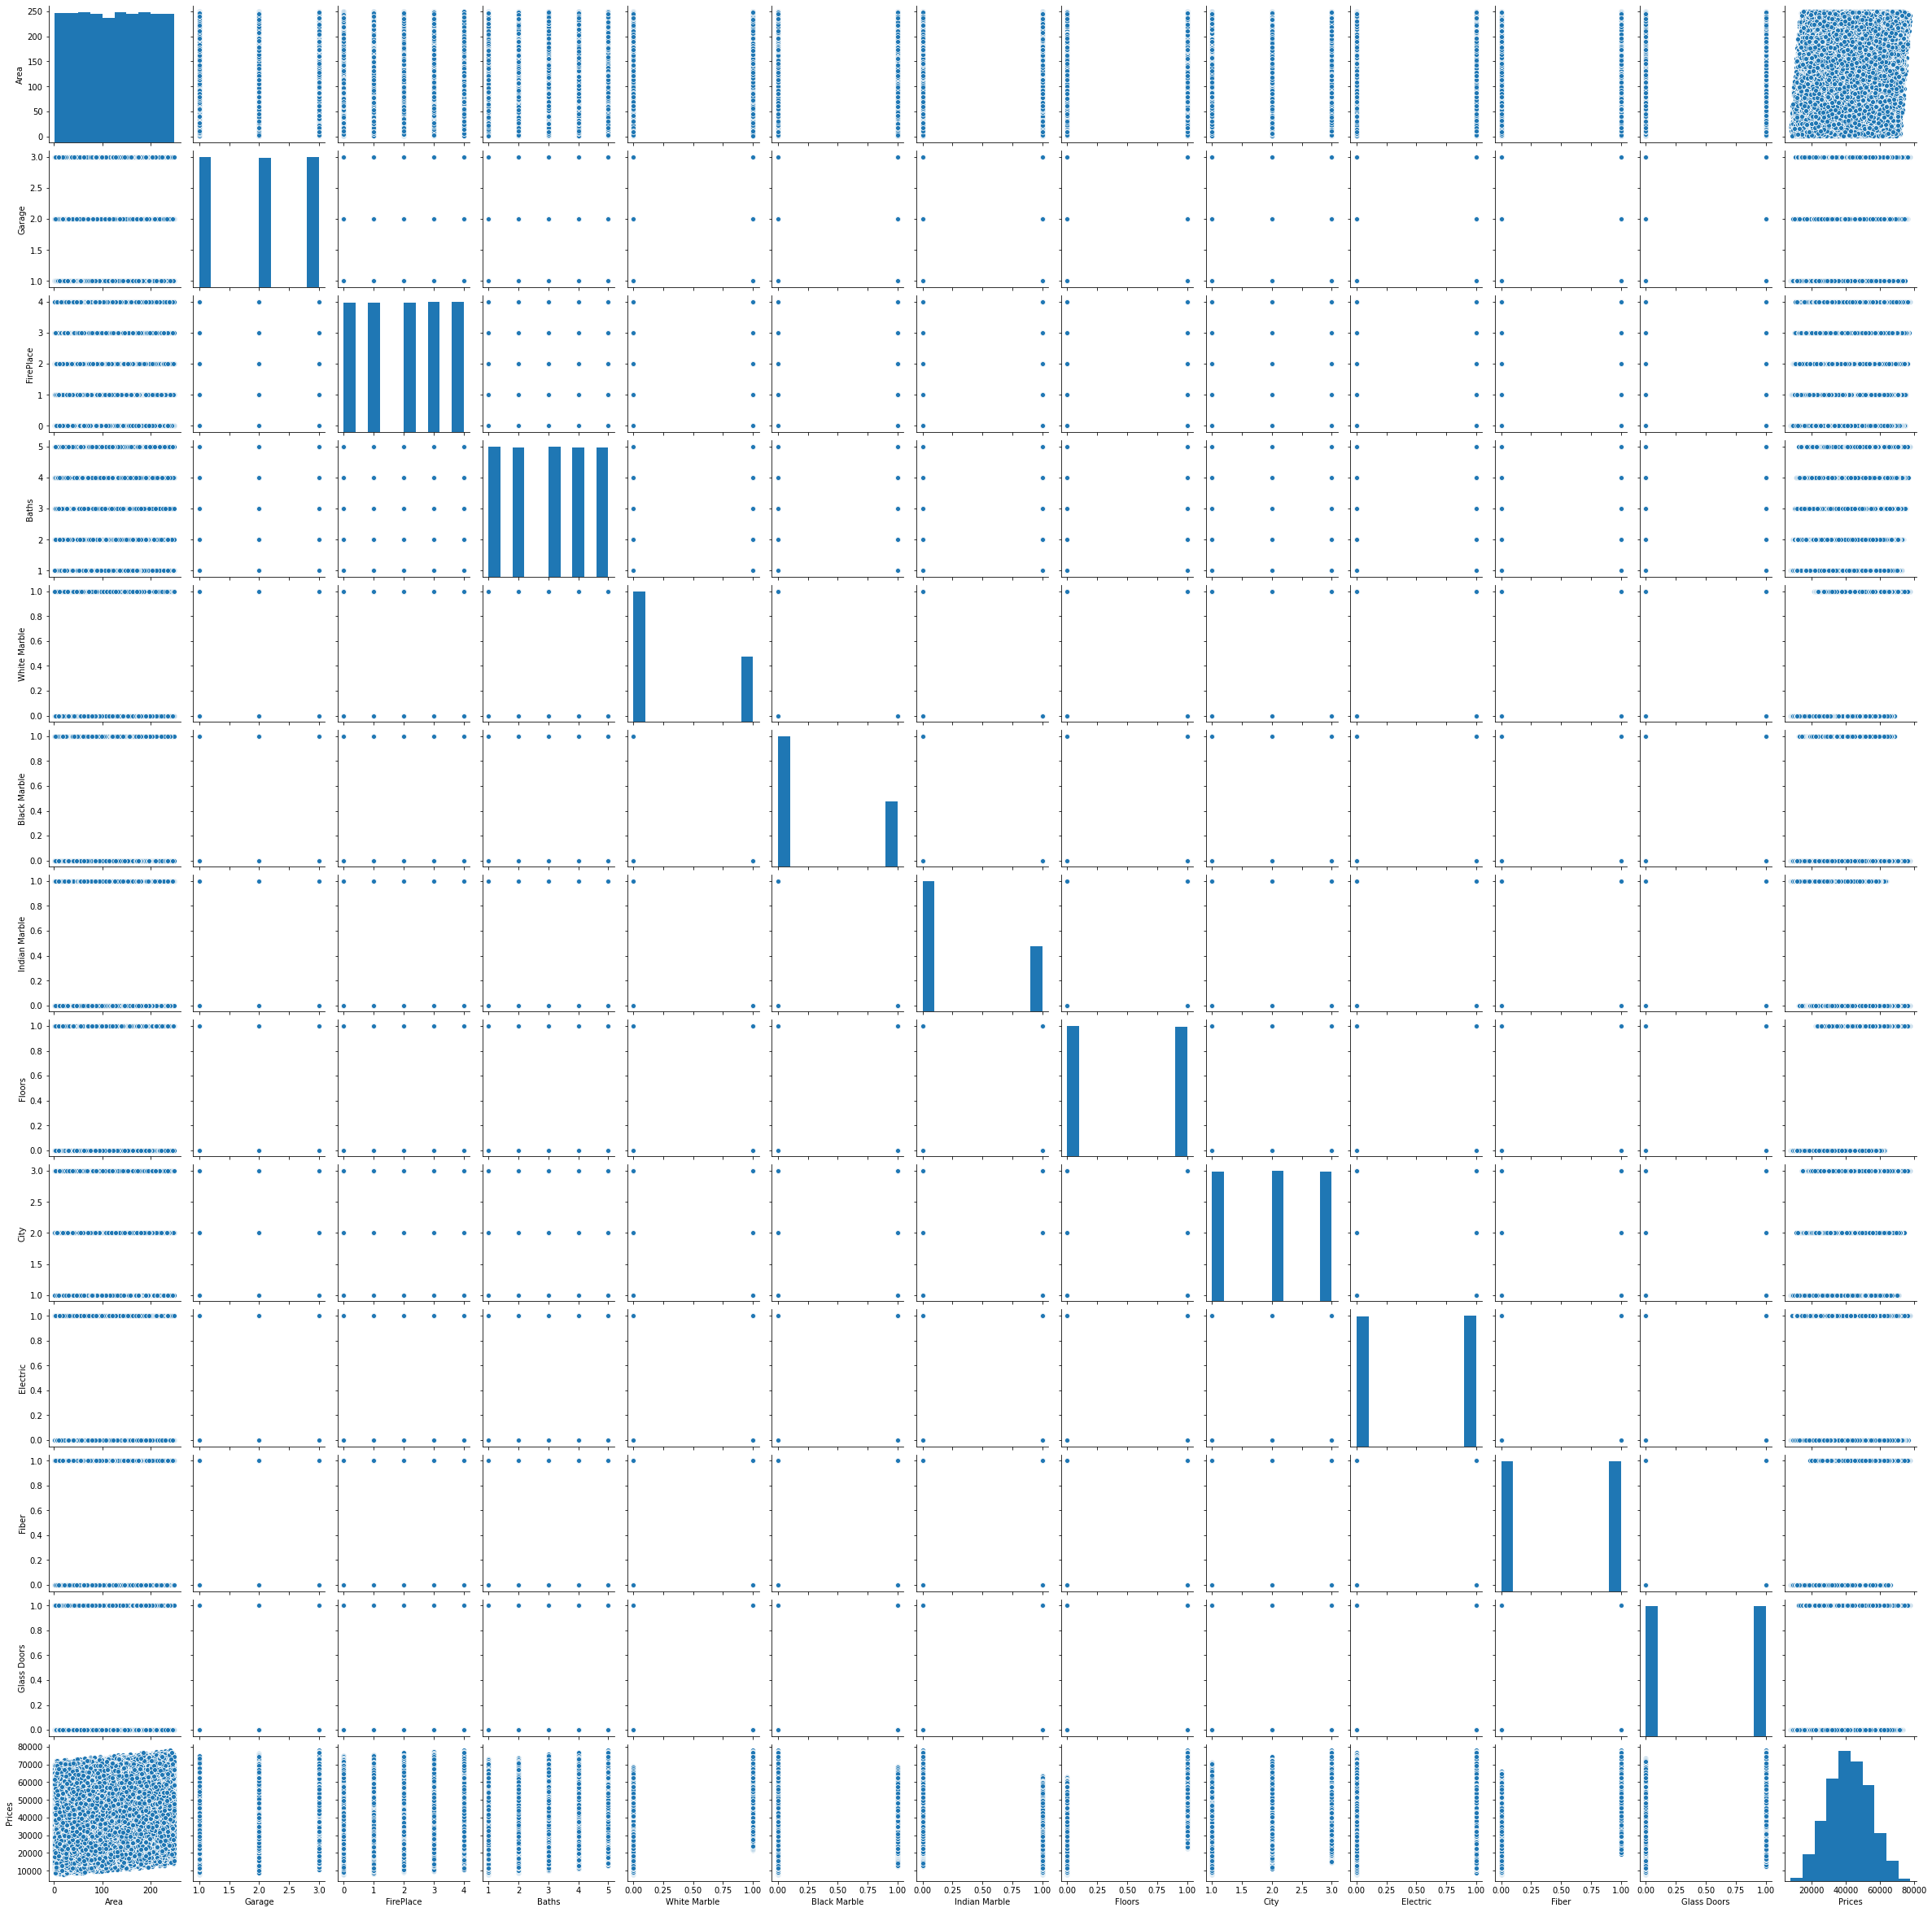

In [42]:
#seaborn pairs plots
sns.pairplot(dff)

<AxesSubplot:>

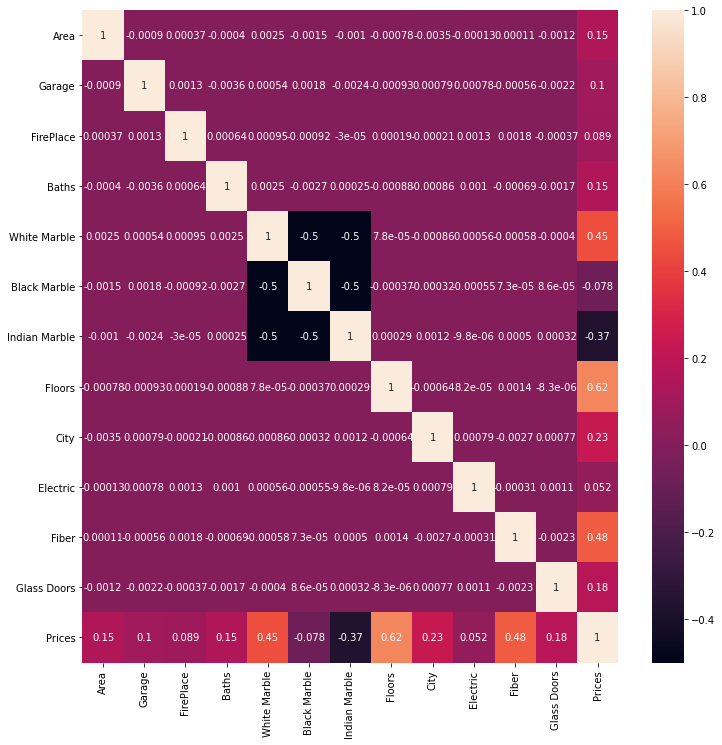

In [45]:
# heatmap
figure, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dff.corr(),annot=True)

In [ ]:
# drop the columns with less relevant to the feature
dff = dff.drop(columns=['Electric','FirePlace','Black Marble'])

In [50]:
X = dff.drop(["Prices"], axis=1)
y = dff["Prices"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

<Figure size 432x288 with 0 Axes>

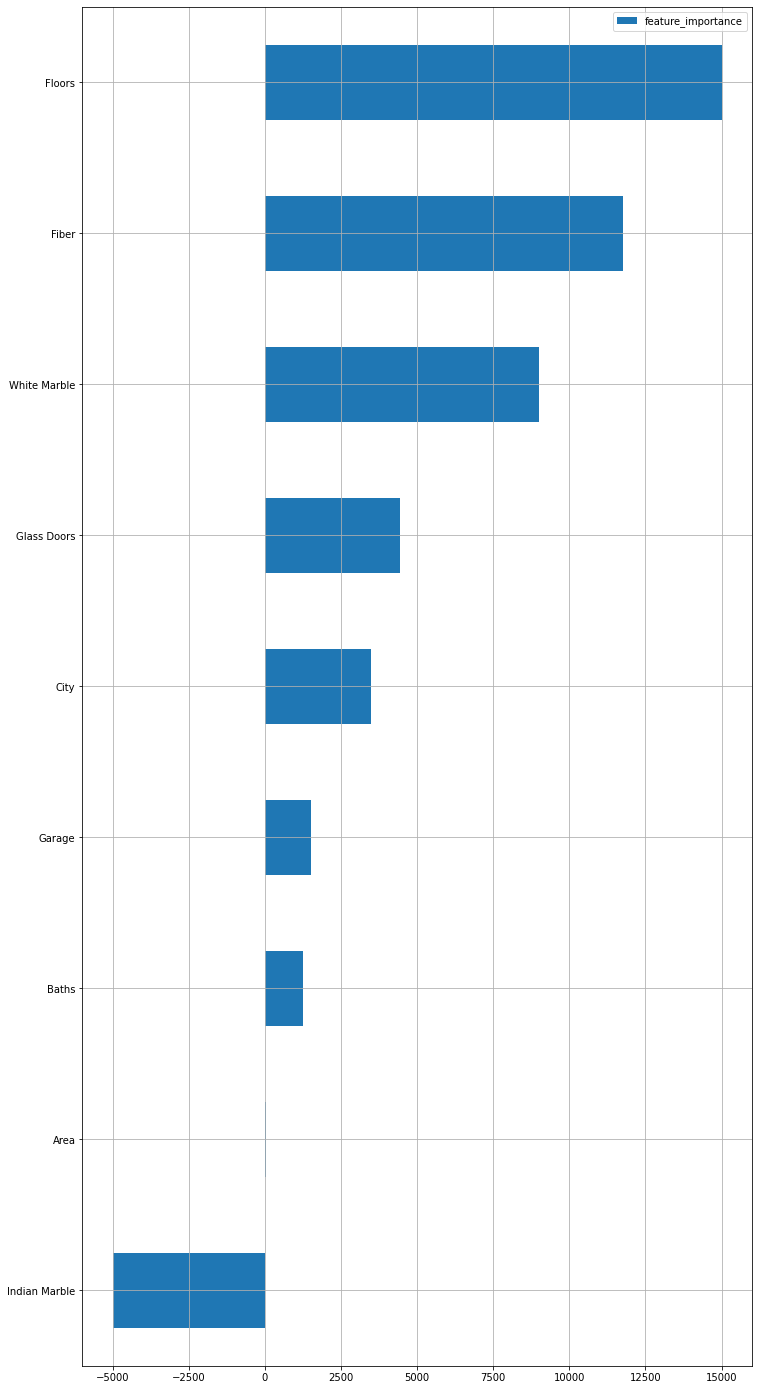

In [52]:
#show feature importance using lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
lasso_fi = pd.DataFrame({'feature_importance':lasso.coef_}, index=X.columns)
lasso_fi.sort_values('feature_importance', ascending=False)
plt.figure()
lasso_fi[lasso_fi['feature_importance'] != 0].sort_values('feature_importance').plot(kind='barh', figsize=(12, 25))
plt.grid()
plt.show()

From the plot above the most important features to the price is number of Floors, Fiber, white marble, Glass Doors, and lot size. Built train set using these five features.